In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('../data/weblogs1.csv')

df = df.drop(['ID', 'STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)
X = df.drop(['ROBOT'], axis=1)
y = df['ROBOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-NearestNeighborsClassifier

##### Met scaler testen

In [8]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn_scaled = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('grid_search', GridSearchCV(param_grid=param_grid_knn_scaled, estimator=KNeighborsClassifier(), cv=5, n_jobs=-1, scoring='precision'))
])

In [9]:
pipeline.fit(X_train, y_train)

print(pipeline['grid_search'].best_params_)

{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10337
           1       0.89      0.68      0.77      2460

    accuracy                           0.92     12797
   macro avg       0.91      0.83      0.86     12797
weighted avg       0.92      0.92      0.92     12797

[[0.98 0.02]
 [0.32 0.68]]

Accuracy: 92.33%


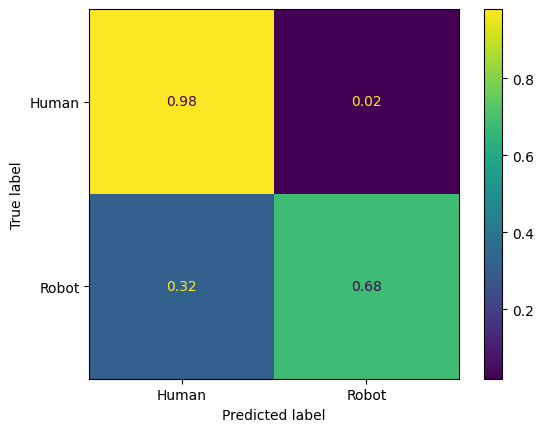

In [10]:
knn_clf = pipeline['grid_search'].best_estimator_

knn_clf.fit(X_train, y_train)

y_pred_knn_scaled = knn_clf.predict(X_test)

print(classification_report(y_test, y_pred_knn_scaled))
print(np.round(confusion_matrix(y_test, y_pred_knn_scaled, normalize='true'), 2))
print("\nAccuracy: {:.2f}".format(((accuracy_score(y_test, y_pred_knn_scaled)) * 100)) + "%")

cmDiplay = ConfusionMatrixDisplay(np.round(confusion_matrix(y_test, y_pred_knn_scaled, normalize='true'), 2), display_labels=['Human', 'Robot'])
cmDiplay.plot()

##### Zonder scaler

In [11]:
grid_search_no_scale = GridSearchCV(param_grid=param_grid_knn_scaled, estimator=KNeighborsClassifier(), cv=5, n_jobs=-1, verbose=2, scoring='precision')

In [12]:
grid_search_no_scale.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='precision', verbose=2)

In [13]:
print(grid_search_no_scale.best_params_)

knn_clf_no_scale = grid_search_no_scale.best_estimator_

knn_clf_no_scale.fit(X_train, y_train)

y_pred_knn_no_scale = knn_clf_no_scale.predict(X_test)

print(classification_report(y_test, y_pred_knn_no_scale))
print(np.round(confusion_matrix(y_test, y_pred_knn_no_scale, normalize='true'), 2))
print("\nAccuracy: {:.2f}".format(((accuracy_score(y_test, y_pred_knn_no_scale)) * 100)) + "%")

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10337
           1       0.89      0.68      0.77      2460

    accuracy                           0.92     12797
   macro avg       0.91      0.83      0.86     12797
weighted avg       0.92      0.92      0.92     12797

[[0.98 0.02]
 [0.32 0.68]]

Accuracy: 92.26%


Scaling is nodig voor betere resultaten

In [14]:
filename = '../main_models/kneighbors_classifier2.sav'

pickle.dump(knn_clf, open(filename, 'wb'))

### Logistic Regression

##### Met scaling

In [12]:
param_grid = {
    'C': [0.1, 1, 10, 20, 30, 80, 85, 90, 95, 100, 105, 110, 115, 120, 140, 160, 180, 200],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 300, 400, 500, 1000, 2000, 3000]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('grid_search', GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1))
])

In [23]:
pipeline.fit(X_train, y_train)

print(pipeline['grid_search'].best_params_)

lgr_clf = pipeline['grid_search'].best_estimator_

lgr_clf.fit(X_train, y_train)

y_pred_lgr = lgr_clf.predict(X_test)

print(classification_report(y_test, y_pred_lgr))
print(np.round(confusion_matrix(y_test, y_pred_lgr, normalize='true'), 2))

c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6480 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

{'C': 20, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     10337
           1       0.81      0.26      0.39      2460

    accuracy                           0.85     12797
   macro avg       0.83      0.62      0.65     12797
weighted avg       0.84      0.85      0.81     12797

[[0.99 0.01]
 [0.74 0.26]]


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [3]:
filename = '../main_models/logistic_regression2.sav'

lgr_clf = LogisticRegression(C=20, max_iter=100, penalty='l2', random_state=42, solver='newton-cg')

lgr_clf.fit(X_train, y_train)

pickle.dump(lgr_clf, open(filename, 'wb'))

c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


##### Zonder scaling

In [13]:
gs_no_scale = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1)

gs_no_scale.fit(X_train, y_train)

print(gs_no_scale.best_params_)

lgr_clf_no_scale = gs_no_scale.best_estimator_

lgr_clf_no_scale.fit(X_train, y_train)

y_pred_lgr_no_scale = lgr_clf_no_scale.predict(X_test)

print(classification_report(y_test, y_pred_lgr_no_scale))

print(np.round(confusion_matrix(y_test, y_pred_lgr_no_scale, normalize='true'), 2))

c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6480 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

{'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10337
           1       0.81      0.95      0.87      2460

    accuracy                           0.95     12797
   macro avg       0.90      0.95      0.92     12797
weighted avg       0.95      0.95      0.95     12797

[[0.95 0.05]
 [0.05 0.95]]


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [14]:
filename = "../main_models/logistic_regression_no_scale2.sav"

pickle.dump(lgr_clf_no_scale, open(filename, 'wb'))

### Linear SVC

##### Met scaling

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 15, 20, 25, 30, 35],
    'max_iter': [1000, 2000, 3000, 3500, 4000]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('grid_search', GridSearchCV(LinearSVC(random_state=42), param_grid, n_jobs=-1, cv=5))
])

In [7]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(np.round(confusion_matrix(y_test, y_pred, normalize='true'), 2))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10337
           1       0.81      0.94      0.87      2460

    accuracy                           0.95     12797
   macro avg       0.90      0.95      0.92     12797
weighted avg       0.95      0.95      0.95     12797

[[0.95 0.05]
 [0.06 0.94]]


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
pipeline.named_steps['grid_search'].best_params_

{'C': 30, 'max_iter': 3000}

In [3]:
filename = '../main_models/linear_svc2.sav'

lsvc = LinearSVC(C=30, max_iter=3000, random_state=42)

lsvc.fit(X_train, y_train)

y_pred = lsvc.predict(X_test)

print(classification_report(y_test, y_pred))

print(np.round(confusion_matrix(y_test, y_pred, normalize='true'), 2))

pickle.dump(lsvc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10337
           1       0.59      0.90      0.71      2460

    accuracy                           0.86     12797
   macro avg       0.78      0.87      0.81     12797
weighted avg       0.90      0.86      0.87     12797

[[0.85 0.15]
 [0.1  0.9 ]]


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### Zonder scaling

In [16]:
gs_no_scale = GridSearchCV(LinearSVC(random_state=42), param_grid, n_jobs=-1, cv=5)

gs_no_scale.fit(X_train, y_train)

print(gs_no_scale.best_params_)

lsvc_no_scale = gs_no_scale.best_estimator_

lsvc_no_scale.fit(X_train, y_train)

y_pred_no_scale = lsvc_no_scale.predict(X_test)

print(classification_report(y_test, y_pred_no_scale))

print(np.round(confusion_matrix(y_test, y_pred_no_scale, normalize='true'), 2))

c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.1, 'max_iter': 3000}
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10337
           1       0.76      0.64      0.69      2460

    accuracy                           0.89     12797
   macro avg       0.84      0.79      0.81     12797
weighted avg       0.89      0.89      0.89     12797

[[0.95 0.05]
 [0.36 0.64]]


c:\Users\buyse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
